In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,losses
import numpy as np
from PIL import Image
from IPython.display import display

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) ])

model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

1563/1563 [==============================] - 80s 48ms/step - loss: 1.5272 - accuracy: 0.4421 - val_loss: 1.2564 - val_accuracy: 0.5497
313/313 - 6s - loss: 1.2564 - accuracy: 0.5497 - 6s/epoch - 19ms/step
Test accuracy: 54.97%


In [7]:
def predict_new_image(image_path, model):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    return class_index

Enter Image Name:1


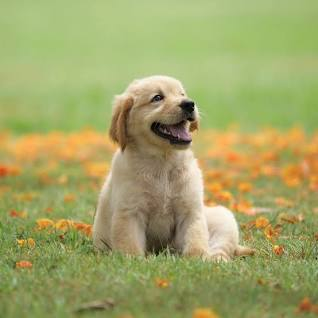

1/1 [==============================] - 0s 47ms/step
Image Predicted As Bird


In [14]:
num = input('Enter Image Name:')
image_path = f'Sample {num}.jpg'
display(Image.open(image_path))
class_index= predict_new_image(image_path, model)
l=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print('Image Predicted As', l[class_index].title())